# 5.5 使用scikit-learn提供的自助聚合法處理分類問題(BaggingClassifier)

In [9]:
# --- 第 1 部分 ---
# 載入函式庫與資料
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
import numpy as np
digits = load_digits()

np.random.seed(1)
train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]


In [7]:
help(BaggingClassifier)

Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.base.ClassifierMixin, BaseBagging)
 |  BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
 |  
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the dataset are drawn

In [2]:
# --- 第 2 部分 ---
# 建立集成模型
ensemble_size = 10
ensemble = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                             n_estimators = ensemble_size, # 要產生多少個基學習器
                             oob_score = True, # default=False ;True 計算基學習器的袋外分數
                             n_jobs=None) # default=None 設定要多少個平行程序來進行自助聚合
# n_jobs : int, default=None

In [3]:
# --- 第 3 部分 ---
# 訓練模型
ensemble.fit(train_x, train_y)

C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)

In [4]:
# --- 第 4 部分 ---
# 評估模型
ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)


In [8]:
# --- 第 5 部分 ---
# 顯示準確率
print('Bagging: %.2f' % ensemble_acc)
print('Out-of_bag: %.2f' % ensemble.oob_score_)

Bagging: 0.86
Out-of_bag: 0.90


# 查看1至38個基學習器的自助聚合結果差異(驗證曲線)

C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anac

C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anac

C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anac

C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anac

C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\011305\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\011305\Anac

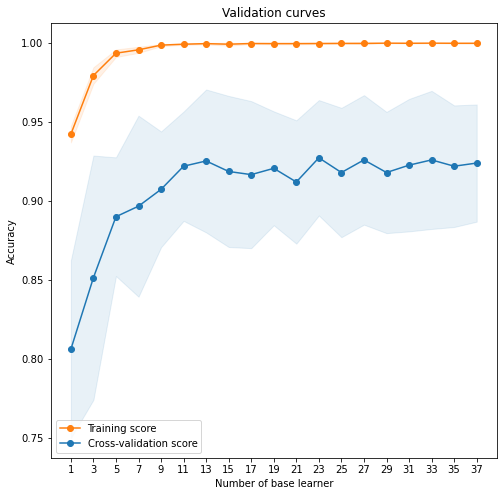

In [6]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# 計算訓練資料集以及驗證資料集準確率
param_range = list(range(1, 39, 2)) 
train_scores, test_scores = validation_curve(ensemble, 
                                             train_x, 
                                             train_y,
                                             param_name = 'n_estimators',
                                             param_range = param_range,
                                             cv = 10,
                                             scoring = "accuracy")

# 對每個超參數計算模型準確率的平均數與標準差
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (8, 8))
plt.title('Validation curves')
# 繪製標準差
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha = 0.1,
                 color = "C1")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha = 0.1, color = "C0")

# 繪製平均數
plt.plot(param_range, train_scores_mean, 'o-', color = "C1",
         label = "Training score")
plt.plot(param_range, test_scores_mean, 'o-', color = "C0",
         label = "Cross-validation score")
plt.xticks(param_range)
plt.xlabel('Number of base learner')
plt.ylabel('Accuracy')
plt.legend(loc = "best")
plt.show()
